In [2]:
# import libraries
import pandas as pd
import numpy as np
from tensorflow import keras

# load model
train = pd.read_csv("datasets/mnist/mnist_train.csv")
test = pd.read_csv("datasets/mnist/mnist_test.csv")

# model preprocessing
x_train = np.array(train.iloc[:, 1:].values)
y_train = np.array(train.iloc[:, 0].values)

x_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

x_train = x_train / 255.
x_test = x_test / 255.

num_classes = 10
input_shape = (28,28,1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

x_train.shape

(60000, 28, 28, 1)

In [3]:
# model creating
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Conv2D(32,kernel_size=(3, 3), activation="sigmoid"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3, 3), activation="sigmoid"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(num_classes, activation="softmax"))

# model compile
sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.save('mnist_model.h5')

# evaluate model
loss, accuracy = model.evaluate(x_test, y_test)

print(f"\nLoss: {loss:.4f}, Accuracy: {accuracy*100:.2f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9502 - loss: 0.1716 - val_accuracy: 0.9560 - val_loss: 0.1600
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9510 - loss: 0.1654 - val_accuracy: 0.9588 - val_loss: 0.1523
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9534 - loss: 0.1615 - val_accuracy: 0.9594 - val_loss: 0.1508
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9528 - loss: 0.1618 - val_accuracy: 0.9624 - val_loss: 0.1443
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9548 - loss: 0.1539 - val_accuracy: 0.9633 - val_loss: 0.1403
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9600 - loss: 0.1421 - val_accuracy: 0.9642 - val_loss: 0.1378
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9578 - loss: 0.1453 - val_accuracy: 0.9637 - val_loss: 0.1347
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9605 - loss: 0.1391 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1408

Loss: 0.1214, Accuracy: 96.54


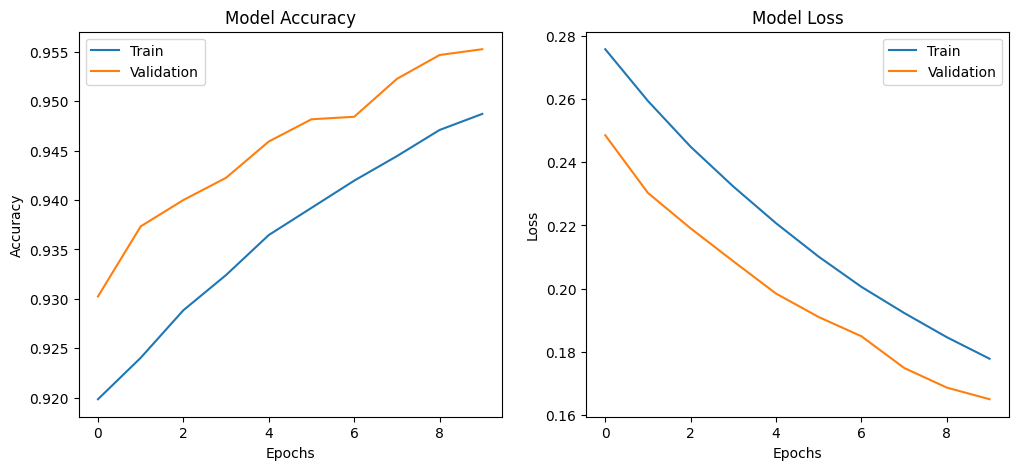

In [14]:
import matplotlib.pylab as plt


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()
